# A Custom Visualization

---

In [1]:
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
import matplotlib.pyplot as plt
from scipy.stats import sem, t
from matplotlib.cm import coolwarm as cmap, ScalarMappable
from matplotlib.colors import Normalize
from matplotlib import ticker

%matplotlib notebook

confidence = 0.95

n = df.shape[0]
df_mean = df.mean(axis=1)
std_err = sem(df, axis=1)
yerr = std_err * t.ppf((1 + confidence) / 2, n - 1)

norm = Normalize(vmin=-1, vmax=1)

<IPython.core.display.Javascript object>


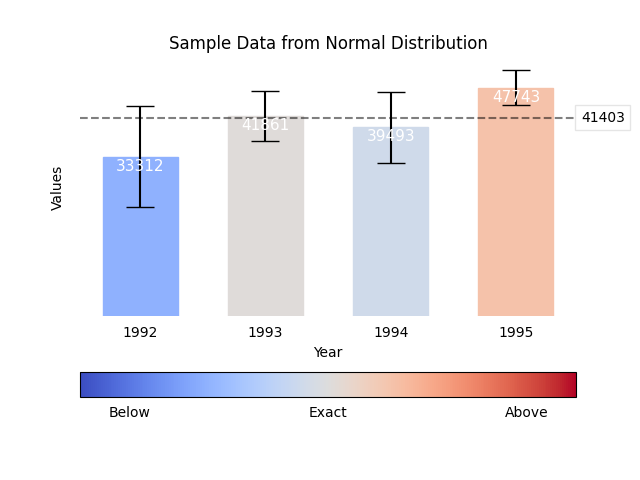

<ipython-input-3-1f62ac01bf2a>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_xticklabels(['','Below', 'Exact', 'Above'])


9

In [3]:
plt.figure()
bars = plt.bar(df_mean.index, df_mean.values, width=0.6, yerr=yerr, capsize=10, 
               color=cmap(norm(2*(df_mean-3.3e4)/df_mean)))
ax = plt.gca()

#remove ticks
ax.tick_params(left=False, right=False, top=False, bottom=False)

#remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

#set x axis labels
_ = plt.xticks(df_mean.index)

#remove y-axis tick labels
ax.yaxis.set_ticklabels([])

#set y-value on bars
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 3000, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=11)

ax.set_ylabel('Values')
ax.set_xlabel('Year')
ax.set_title('Sample Data from Normal Distribution')

#adding horzontal line
h_line = ax.axhline(3.3e4, color='black', alpha=0.5, linestyle='--')

#adding text indicating position of horzontal line
line_text = ax.text(1.01, 3.3e4, "33000", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.1),
                    transform=ax.get_yaxis_transform())

#Plotting colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, orientation='horizontal')
cbar.locator = ticker.MaxNLocator(nbins=3)
cbar.update_ticks()
cbar.ax.tick_params(bottom=False)
cbar.ax.set_xticklabels(['','Below', 'Exact', 'Above'])

def onclick(event):
    #adjust the position of indicator
    h_line.set_ydata(event.ydata)
    line_text.set_text(str(int(event.ydata)))
    line_text.set_position((1.01, event.ydata))
    
    colors = cmap(norm(2*(df_mean-event.ydata)/df_mean))
    #change color according to the position of indicator
    for bar, color in zip(bars, colors):
        bar.set_color(color)

plt.gcf().canvas.mpl_connect('button_press_event', onclick)